In [150]:
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import string
import numpy as np
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [151]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 7210-D35D

 Directory of C:\Users\ramac\Downloads

12/10/2024  09:51 PM    <DIR>          .
12/10/2024  09:51 PM    <DIR>          ..
12/10/2024  02:44 PM    <DIR>          .ipynb_checkpoints
11/14/2024  10:56 AM         1,160,315 1. Introduction to PyTorch.pdf
12/02/2024  06:00 PM            33,948 5 Tips to Help You Declutter Your Computer.jpg
10/16/2024  09:33 AM       711,706,536 565.90-notebook-win10-win11-64bit-international-dch-whql.exe
07/07/2024  10:30 AM            33,093 5Paisa Capital.xlsx
09/09/2024  12:41 PM        46,075,597 AcademicHistory25.csv
10/09/2024  01:52 PM           514,752 amazon_alexa.tsv
07/18/2024  07:00 PM       956,650,896 Anaconda3-2024.06-1-Windows-x86_64.exe
06/27/2024  07:34 PM         2,922,113 archive (1).zip
11/11/2024  03:03 PM         2,097,152 archive (10) (1).zip
11/11/2024  01:49 PM         2,994,798 archive (10).zip
11/12/2024  02:33 PM         3,045,449 archive (11).zip
11/22/2024  0

In [152]:
df = pd.read_csv('emails_project.csv') 

In [153]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [154]:
df.shape

(5728, 2)

In [155]:
df['spam'].unique()

array([1, 0], dtype=int64)

Text(0, 0.5, 'count')

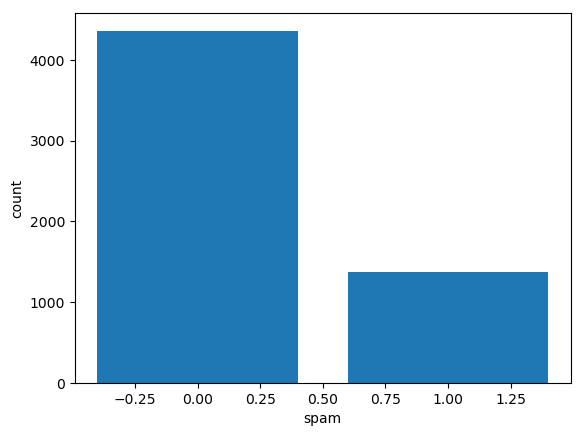

In [156]:
plt.bar(df['spam'].unique(), [df[df['spam'] == 1].shape[0], df[df['spam'] == 0].shape[0]])
plt.xlabel('spam')
plt.ylabel('count')

#### Spams are more

In [157]:
df.isna().sum()

text    0
spam    0
dtype: int64

#### No Nan values

In [158]:
import string
from nltk.corpus import stopwords

# Download the stopwords if you haven't already
import nltk
nltk.download('stopwords')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text into words
    words = text.split()
    # Get the set of English stopwords
    stop_words = set(stopwords.words('english'))
    # Remove stopwords
    filtered_words = [word for word in words if word not in stop_words]

    return filtered_words


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [159]:
df['processed_text'] = df['text'].apply(preprocess_text)

In [160]:
df.head()

,text,spam,processed_text
0,Subject: naturally irresistible your corporate...,1,"[subject, naturally, irresistible, corporate, ..."
1,Subject: the stock trading gunslinger fanny i...,1,"[subject, stock, trading, gunslinger, fanny, m..."
2,Subject: unbelievable new homes made easy im ...,1,"[subject, unbelievable, new, homes, made, easy..."
3,Subject: 4 color printing special request add...,1,"[subject, 4, color, printing, special, request..."
4,"Subject: do not have money , get software cds ...",1,"[subject, money, get, software, cds, software,..."


In [161]:
sentences = df['processed_text'].tolist()

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the trained model (optional)
model.save("word2vec.model")

# Print the vector for a sample word
word_vector = model.wv['sample'] 

In [162]:
def get_document_vector(text, model):
    # Get word vectors for the words in the document
    word_vectors = [model.wv[word] for word in text if word in model.wv]
    
    # If no word vectors exist (e.g., out-of-vocabulary words), return a zero vector
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)  # Return a zero vector

    # Return the average of the word vectors
    return np.mean(word_vectors, axis=0)

# Generate document vectors for each row in the DataFrame using the pre-trained Word2Vec model
df['document_vector'] = df['processed_text'].apply(lambda x: get_document_vector(x, model))

# Preview the document vectors


In [163]:
df.head()

,text,spam,processed_text,document_vector
0,Subject: naturally irresistible your corporate...,1,"[subject, naturally, irresistible, corporate, ...","[-0.15080358, -0.5550073, 0.18366364, -0.06230..."
1,Subject: the stock trading gunslinger fanny i...,1,"[subject, stock, trading, gunslinger, fanny, m...","[-0.100309126, 0.05651662, 0.120450035, -0.020..."
2,Subject: unbelievable new homes made easy im ...,1,"[subject, unbelievable, new, homes, made, easy...","[0.05331086, -0.32427263, 0.24595317, -0.08426..."
3,Subject: 4 color printing special request add...,1,"[subject, 4, color, printing, special, request...","[-0.09442674, -0.5254719, 0.0163834, -0.316396..."
4,"Subject: do not have money , get software cds ...",1,"[subject, money, get, software, cds, software,...","[-0.10841254, -0.37148294, 0.018379286, 0.0204..."


In [164]:
X = np.array(df['document_vector'].tolist())
y = np.array(df['spam'])

In [165]:
X.shape

(5728, 100)

In [166]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
# Train a Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

C:\Users\ramac\anaconda3\anaconda\anaconda\envs\pytorchenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [169]:
# Make predictions on the test set
y_pred = model_lr.predict(X_test)

# Evaluate the model using accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report


Accuracy: 0.9572


C:\Users\ramac\anaconda3\anaconda\anaconda\envs\pytorchenv\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


### Predicting the new text it is spam or not

In [170]:
new_text = "Subject: you won a one million$"
text = preprocess_text(new_text)
new_document_vector = get_document_vector(text, model)

# Reshape the new document vector to match the shape expected by the classifier
new_document_vector = new_document_vector.reshape(1, -1)

# Predict the class of the new text using the trained model
predicted_class = model_lr.predict(new_document_vector)

# Output the prediction
print(f"The predicted class for the new text is: {predicted_class[0]}")

The predicted class for the new text is: 1


C:\Users\ramac\anaconda3\anaconda\anaconda\envs\pytorchenv\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [171]:
df.head()

,text,spam,processed_text,document_vector
0,Subject: naturally irresistible your corporate...,1,"[subject, naturally, irresistible, corporate, ...","[-0.15080358, -0.5550073, 0.18366364, -0.06230..."
1,Subject: the stock trading gunslinger fanny i...,1,"[subject, stock, trading, gunslinger, fanny, m...","[-0.100309126, 0.05651662, 0.120450035, -0.020..."
2,Subject: unbelievable new homes made easy im ...,1,"[subject, unbelievable, new, homes, made, easy...","[0.05331086, -0.32427263, 0.24595317, -0.08426..."
3,Subject: 4 color printing special request add...,1,"[subject, 4, color, printing, special, request...","[-0.09442674, -0.5254719, 0.0163834, -0.316396..."
4,"Subject: do not have money , get software cds ...",1,"[subject, money, get, software, cds, software,...","[-0.10841254, -0.37148294, 0.018379286, 0.0204..."


In [172]:
df['text'][1]

'Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no  libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no  sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no '

### Building Model By ANN

In [173]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [174]:
# 3 hiddden layes
class ModelBuilding(nn.Module):
    def __init__  (self,in_feat,h1,h2,h3,ou_lay):
        super(ModelBuilding,self).__init__()
        self.fc1 = nn.Linear(in_feat,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.fc3 = nn.Linear(h2,h3)
        self.fc4 = nn.Linear(h3,ou_lay)
        
    def feed_forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = self.fc4(X)
        
        return X
        

In [175]:
torch.manual_seed(30)
model = ModelBuilding(100,200,100,50,2)
model

ModelBuilding(
  (fc1): Linear(in_features=100, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=2, bias=True)
)

In [176]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [177]:
epochs = 1000
losses = []
X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.int64)
for i in range(epochs):
    i+=1
    y_pred = model.feed_forward(X_train)
    y_pred.dtype
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i%50 == 1:
        print('epoch--'+str(i)+'loss--'+str(loss))

epoch--1loss--tensor(0.6904, grad_fn=<NllLossBackward0>)
epoch--51loss--tensor(0.1651, grad_fn=<NllLossBackward0>)
epoch--101loss--tensor(0.0763, grad_fn=<NllLossBackward0>)
epoch--151loss--tensor(0.0466, grad_fn=<NllLossBackward0>)
epoch--201loss--tensor(0.0291, grad_fn=<NllLossBackward0>)
epoch--251loss--tensor(0.0164, grad_fn=<NllLossBackward0>)
epoch--301loss--tensor(0.0082, grad_fn=<NllLossBackward0>)
epoch--351loss--tensor(0.0037, grad_fn=<NllLossBackward0>)
epoch--401loss--tensor(0.0018, grad_fn=<NllLossBackward0>)
epoch--451loss--tensor(0.0010, grad_fn=<NllLossBackward0>)
epoch--501loss--tensor(0.0006, grad_fn=<NllLossBackward0>)
epoch--551loss--tensor(0.0004, grad_fn=<NllLossBackward0>)
epoch--601loss--tensor(0.0003, grad_fn=<NllLossBackward0>)
epoch--651loss--tensor(0.0002, grad_fn=<NllLossBackward0>)
epoch--701loss--tensor(0.0002, grad_fn=<NllLossBackward0>)
epoch--751loss--tensor(0.0002, grad_fn=<NllLossBackward0>)
epoch--801loss--tensor(0.0001, grad_fn=<NllLossBackward0>)


In [178]:
import matplotlib.pyplot as plt
%matplotlib inline

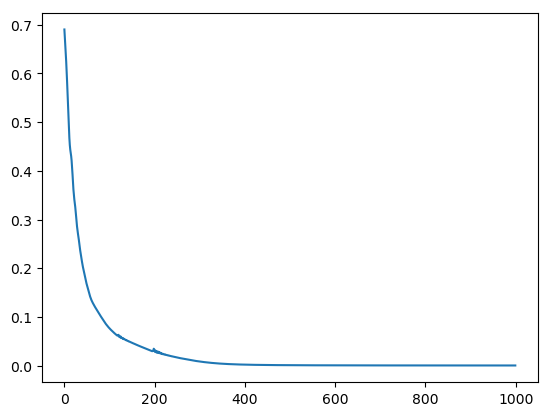

In [179]:
plt.plot(range(epochs),[loss.detach().numpy() for loss in losses])

In [181]:
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

In [187]:
c = 0
for i in range(len(X_test)):
    y_t_predict = model.feed_forward(X_test[i]).argmax(dim=0).item() 
    if y_t_predict == y_test[i].item():
        c+=1

In [192]:
accuracy_test = 100*c/X_test.shape[0]

In [193]:
accuracy_test

98.25479930191972

In [197]:
torch.save(model.state_dict(), "email_ann_model.pth")